# Calibration of the hyper-parameters of a gaussian process regressor by maximum likelihood

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 
from scipy.optimize import minimize_scalar

from utils import *

## Définition des paramètres

In [2]:
N = 100
X = np.linspace(0, 1, N)
lbda = 0.1
X[:10]

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909])

### 1) a)

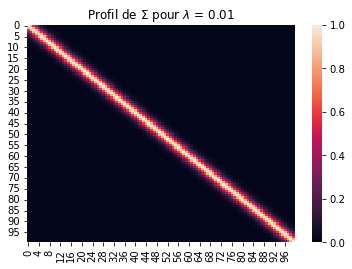

'\nsigma = sigmaKov(X, X, 0.1, add_noise=False)\nsns.heatmap(sigma)\nplt.title("Profil de $\\Sigma$ pour $\\lambda$ = 0.1")\nplt.show()\nsigma = sigmaKov(X, X, 1, add_noise=False)\nsns.heatmap(sigma)\nplt.title("Profil de $\\Sigma$ pour $\\lambda$ = 1")\nplt.show()\n'

In [3]:
sigma = sigmaKov(X, X, 0.01, add_noise=False)
sns.heatmap(sigma)
plt.title("Profil de $\Sigma$ pour $\lambda$ = 0.01")
plt.show()
"""
sigma = sigmaKov(X, X, 0.1, add_noise=False)
sns.heatmap(sigma)
plt.title("Profil de $\Sigma$ pour $\lambda$ = 0.1")
plt.show()
sigma = sigmaKov(X, X, 1, add_noise=False)
sns.heatmap(sigma)
plt.title("Profil de $\Sigma$ pour $\lambda$ = 1")
plt.show()
"""


<AxesSubplot:>

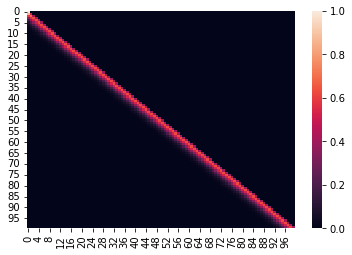

In [4]:
L = np.linalg.cholesky(sigma)
sns.heatmap(L)

Que vaut $m + L^t G$ ?

1) b)

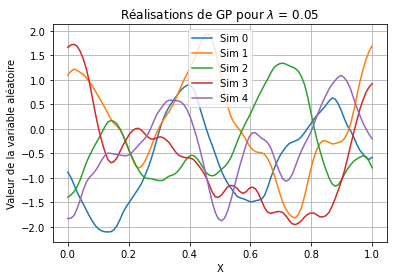

In [5]:

simulGP_gauss(X, 100, 0.05)

### Question 2)

In [6]:
#N = 100
#X = np.linspace(0, 1, N)
X_train = draw_uniform_in_intervals(N)
Y_train = np.sin(4 * np.pi * X_train)
Z = Y_train
#lbda=0.05

In [7]:
def neglikelihood(lbda, Z):
    if lbda <= 0:
        lbda = 1e-7
    sigma = sigmaKov(Z, Z, lbda)
    logdet = np.linalg.slogdet(sigma)[1]
    invsig = np.linalg.inv(sigma)
    
    d = len(Z)
    Z = Z.reshape(d, 1)
    #print(f"Z : {Z}")
    Zt = Z.T
    #print(f"Shapes  zt {Zt.shape}, invsig {invsig.shape}, z {Z.shape},")
    seghalf = Zt @ invsig @ Z
    return (0.5 * (d * np.log(2 * np.pi) + logdet + seghalf)).flatten()[0]

minimize_scalar(neglikelihood, args=(Z), method="bounded", bounds=[1e-7, 100])

     fun: -702.5258142460277
 message: 'Solution found.'
    nfev: 33
  status: 0
 success: True
       x: 3.3406452241143225

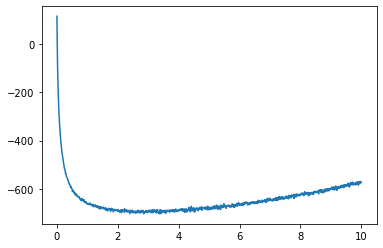

In [8]:
Xtest = np.linspace(1e-7, 10, 1000)
Ytest = [neglikelihood(x, Z) for x in Xtest]
plt.plot(Xtest, Ytest)
plt.show()

In [9]:
def simulGP_sin(X, N, lbda):
    X_random = draw_uniform_in_intervals(N)
    Xsin = np.sin(4*np.pi*X_random)
    sigma = sigmaKov(Xsin, Xsin, lbda)
    L = np.linalg.cholesky(sigma)
    #Lt = L.T
    fig, ax = plt.subplots()
    plt.xlabel("X")
    plt.ylabel("Valeur de la variable aléatoire")
    plt.title(r"Réalisations de GP pour $\lambda$ = " + str(lbda))
    for i in range(2):
        g = np.random.normal(size=N)
        
        z = L @ g 
        #display(z.round(2))
        ax.plot(X_random, z, label = f"Sim {i}")
    ax.plot(X_random, Xsin, label = "Sinus")
    plt.legend()
    plt.grid()
    plt.show()


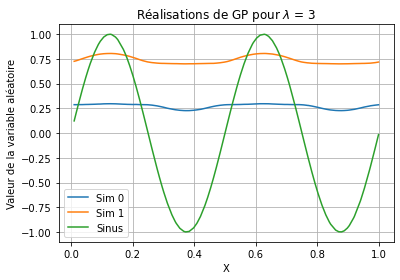

In [10]:
#minimize_scalar(neglikelihood, args=(Z))
simulGP_sin(X, N, 3)

'\nplt.plot(X, mu_s, label="mu")\nplt.plot(X, Y_train, label="sinus")\nplt.grid()\nplt.legend()\n'

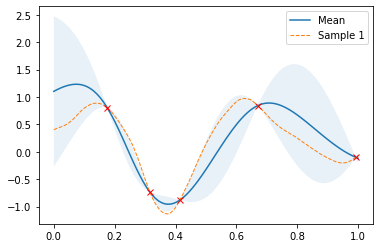

In [42]:
N = 5
X_train = draw_uniform_in_intervals(N)
Y_train = np.sin(4 * np.pi * X_train)
mu_s, cov_s = parameters(X, X_train, Y_train, 0.1)

L = np.linalg.cholesky(cov_s)
g = np.random.normal(size=len(X))
z2 = mu_s + L @ g
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=[z2])

"""
plt.plot(X, mu_s, label="mu")
plt.plot(X, Y_train, label="sinus")
plt.grid()
plt.legend()
"""


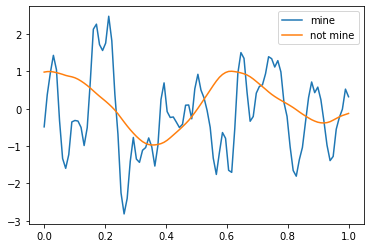

In [32]:
g = np.random.normal(size=len(X))
z1 = L @ g 

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 1)

plt.plot(X, z1, label = "mine")
plt.plot(X, samples.ravel(), label = "not mine")
plt.legend()

In [13]:
#samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
#plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)